# Demo: Boston Housing

Toy example -- use to give first motivation for lecture on features (improving performance).

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = load_boston()

In [26]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
df = data.data

In [28]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX',
        'RM','AGE','DIS','RAD','TAX',
        'PTRATIO','B','LSTAT']

In [29]:
df = pd.DataFrame(df, columns=cols)

In [30]:
train_X, test_X, train_y, test_y = train_test_split(df, data.target, test_size=0.2)

In [31]:
cats = ['CHAS','RAD']
cons = ['CRIM','ZN','INDUS','NOX','RM',
        'AGE','DIS','TAX','PTRATIO','B'
        'LSTAT']

### Log transform 

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


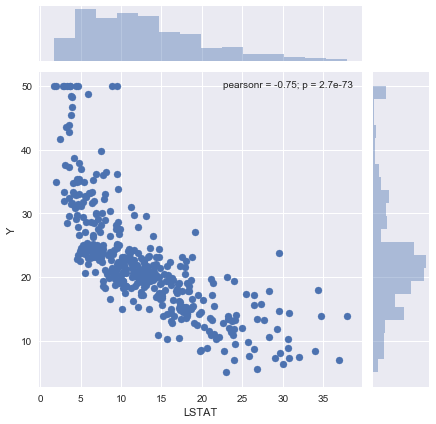

In [33]:
sns.jointplot(train_X['LSTAT'], train_y)\
   .set_axis_labels('LSTAT','Y')
#plt.savefig('figures/untransformed_lstat.png')

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


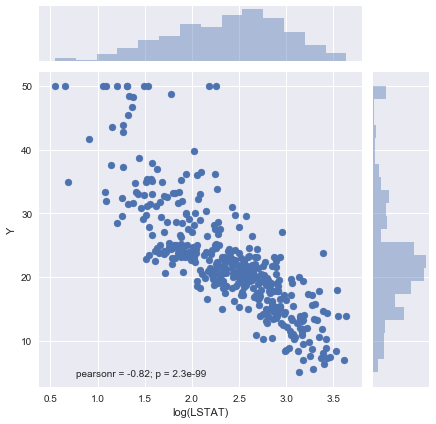

In [34]:
sns.jointplot(np.log(train_X['LSTAT']), train_y)\
   .set_axis_labels('log(LSTAT)','Y')
#plt.savefig('figures/transformed_lstat.png')

## Single variable regression

In [35]:
from sklearn.linear_model import ElasticNetCV

In [36]:
en = ElasticNetCV(cv = 5)

In [37]:
en.fit(np.log(train_X[['LSTAT']]), train_y)
en.score(np.log(test_X[['LSTAT']]), test_y)

0.6411002098564074

In [38]:
en.fit(train_X[['LSTAT']], train_y)
en.score(test_X[['LSTAT']], test_y)

0.5015799957368623

## How about other features?

Text(0, 0.5, 'count')

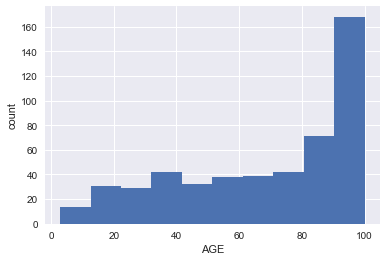

In [40]:
plt.hist(df["AGE"])
plt.xlabel("AGE")
plt.ylabel("count")

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


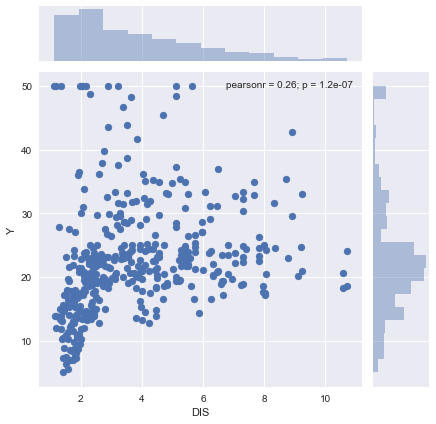

In [41]:
sns.jointplot(train_X['DIS'], train_y)\
   .set_axis_labels('DIS','Y')
#plt.savefig('figures/untransformed_lstat.png')

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


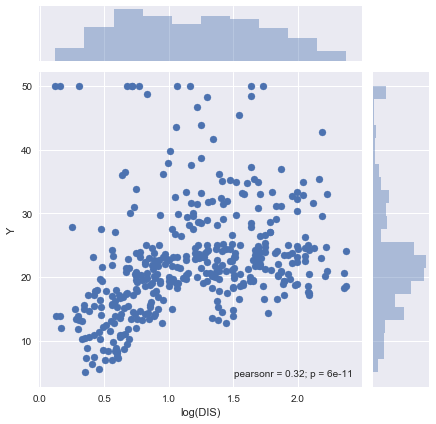

In [43]:
sns.jointplot(np.log(train_X['DIS']), train_y)\
   .set_axis_labels('log(DIS)','Y')
#plt.savefig('figures/untransformed_lstat.png')